# Webscraping Google Play store for Carousell

In [1]:
# !pip install google_play_scraper

In [2]:
# !pip install gensim

In [3]:
# !pip install pyLDAvis

In [4]:
# !pip install wordcloud

In [5]:
#importing libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth',-1)
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from progressbar import ProgressBar

# Library to scrape Google Play
from google_play_scraper import Sort, reviews

# NLP libraries
import re
import nltk
import spacy
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

# Libraries for topic modeling
from pprint import pprint
import gensim, spacy
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
import pyLDAvis.gensim


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

<ipython-input-5-2c62f8afbcba>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


In [6]:
# Function to scrape reviews on google play store
# score: number of stars rated by users
# n_loops: the number of loops to collect reviews in batches of 200
app_reviews = []
def googleplay_scraper(score, n_loops):
    for i in range(n_loops):
        rvs, continuation_token = reviews('com.thecarousell.Carousell',
                                          lang='en',
                                          country='sg',
                                          sort=Sort.NEWEST,
                                          count=200,
                                          filter_score_with=score,
                                          continuation_token=None if i==0 else continuation_token) # To begin crawling from where it last left off
        app_reviews.extend(rvs)
        print('No. of reviews collected: ' + str(len(rvs)))

In [7]:
# Collect reviews that were rated 5 star (10000)
# googleplay_scraper(score=5, n_loops=50)

In [8]:
# # Collect reviews that were rated 4 star (269)
# googleplay_scraper(score=4, n_loops=10)

In [9]:
# # Collect reviews that were rated 3 star (2575)
# googleplay_scraper(score=3, n_loops=12)

In [10]:
# # Collect reviews that were rated 2 star (1726)
# googleplay_scraper(score=2, n_loops=9)

In [11]:
# # Collect reviews that were rated 1 star (4000)
# googleplay_scraper(score=1, n_loops=20)

In [12]:
# pd.DataFrame(app_reviews).to_csv('carousell_appreviews.csv')

In [13]:
df = pd.read_csv('carousell_appreviews.csv', parse_dates=['at','repliedAt'],index_col=0)

In [14]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGgTfx2GgAOGAny8VIoUbJwOqzBr0VkVBs9nDM41Wf9NX-Z-ikQcuzv6aILoMabl7UxF1TYbjAGxBAf8Q,Melanie Gonzales,https://play-lh.googleusercontent.com/-421oOIvWRDs/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucm3MxvHFeuEFjRVWb9JIoeJg3JBIw/photo.jpg,Super Thank you.. kakapost kulang may buyer na agad ako,5,0,2.196.865.857,2021-01-24 14:59:23,NaN,NaT
1,gp:AOqpTOE1iWml800WvcBvrejM1DKVoyMGv8rH1gvU4TiS1u2upYlgv-2gRBO_Dk5B0FA8W-wYhdvkeI1oY4oHXQ,Christopher De Ocampo,https://play-lh.googleusercontent.com/a-/AOh14Ggd4sJarHxEJjARCq_CJvEkFXYX_iDgg0XYdKKhMA,D best,5,0,2.196.865.857,2021-01-24 14:42:43,NaN,NaT
2,gp:AOqpTOE880B1xYEXiJhEjozEPBmp3rAigjZFyvIruWDUWMZFr5LFv1JCu2Kp8iqFBDXA1GvtdrApVixh7nofIw,Riki Lam,https://play-lh.googleusercontent.com/a-/AOh14Gg0BWKmmDx480WzBbfgvfTZUwttLpked7W3AZ6eMaA,Quite good once you get the hang of it.,5,0,2.196.865.857,2021-01-24 13:53:41,NaN,NaT
3,gp:AOqpTOHe0b5CfdHWeFsbNJmQ4elG-i5Gzqbocwfxk4ihaN_22VJHmcnEONn9aIk6jK4SNJWrpGiUtXXQkVwkFQ,kitman tang,https://play-lh.googleusercontent.com/-C6QUVgmyMvs/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucnuSR9GpD_q-pKMKR9u88ZAADHWdw/photo.jpg,good app,5,0,2.196.865.857,2021-01-24 13:42:04,NaN,NaT
4,gp:AOqpTOEFQB_EECTinlxFqhoh4jlVaF24aVJzawI9yMQF2J9BNyGg8-cIdjNoM_UiF5rtkpo5ShT4JzHP73WfEg,Lee KM,https://play-lh.googleusercontent.com/-YTIYaDGzYqg/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucmtzcX4lFeM6ydPxXSN8lRvsNmm3Q/photo.jpg,Faster way selling of my staff,5,0,2.196.865.857,2021-01-24 13:26:55,NaN,NaT


In [15]:
#removing duplicates
df.duplicated().sum()

0

In [16]:
df['score'].value_counts()

5    10000
1    4000 
3    2379 
4    2000 
2    1729 
Name: score, dtype: int64

# EDA

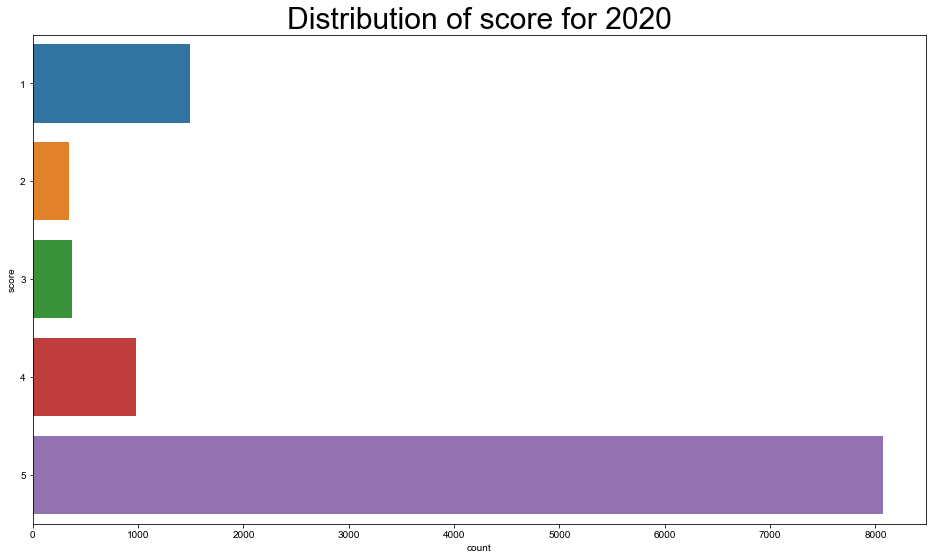

In [17]:
# distribution of score
plt.figure(figsize=(16,9))
plt.title('Distribution of score for 2020', fontsize=30)
sns.countplot(y=df[df['at'] >= pd.Timestamp(2020,1,1)]['score'])
sns.set(font_scale=2)
sns.set()

In [18]:
# creating target variable.
# score of 5 and 4 will be classified as positive (1)
# while score of 3,2,1 will be scored as negative (0)
df['target'] = df['score'].map(lambda x: 1 if x==5 else 0)

In [19]:
df['target'].value_counts(normalize=True)

0    0.502685
1    0.497315
Name: target, dtype: float64

In [20]:
df[df['at'] >= pd.Timestamp(2020,1,1)]['score'].value_counts(normalize=True)

5    0.716835
1    0.132747
4    0.087285
3    0.032765
2    0.030368
Name: score, dtype: float64

In [21]:
df[df['at'] >= pd.Timestamp(2020,1,1)]['target'].value_counts()

1    8073
0    3189
Name: target, dtype: int64

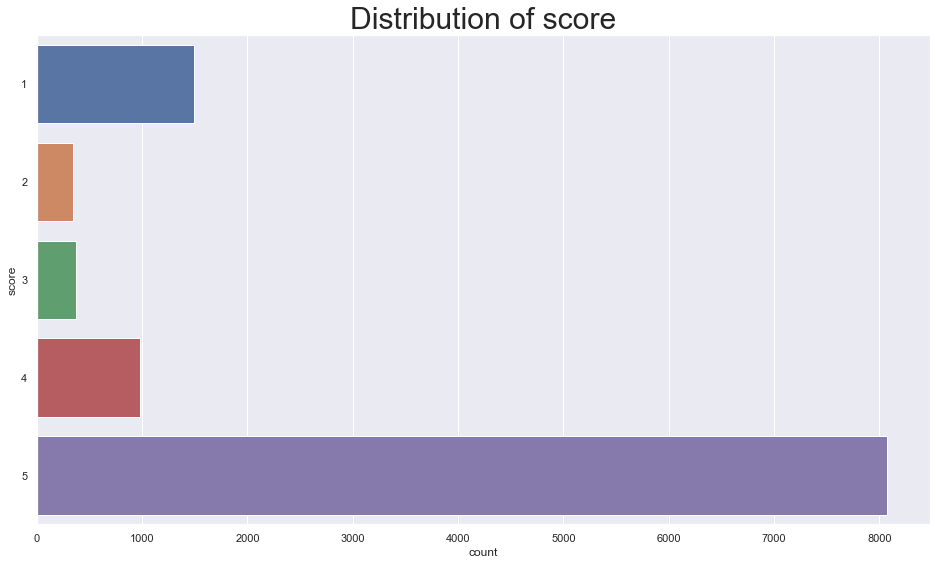

In [22]:
# distribution of score
plt.figure(figsize=(16,9))
plt.title('Distribution of score', fontsize=30)
sns.countplot(y=df[df['at'] >= pd.Timestamp(2020,1,1)]['score'])
sns.set(font_scale=2)

In [23]:
# change of review over time
def subplot_hist(main_title, list_of_titles, xlabels):
    fig, ax = plt.subplots(5, 1, figsize=(10,16), sharex=True, sharey=True)
    for i in range(5):
        ax[i].hist(df[(df['score']==i+1) & (df['at'] >= pd.Timestamp(2020,1,1))]['at'], bins=50)
        ax[i].set_title(list_of_titles[i], weight='bold', fontsize=13)
        ax[i].set_xlabel(xlabels, fontsize=13)
        ax[i].set_ylabel('Frequency', fontsize=13)
        ax[i].set
    fig.suptitle(main_title, fontsize=15, weight='bold')
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)

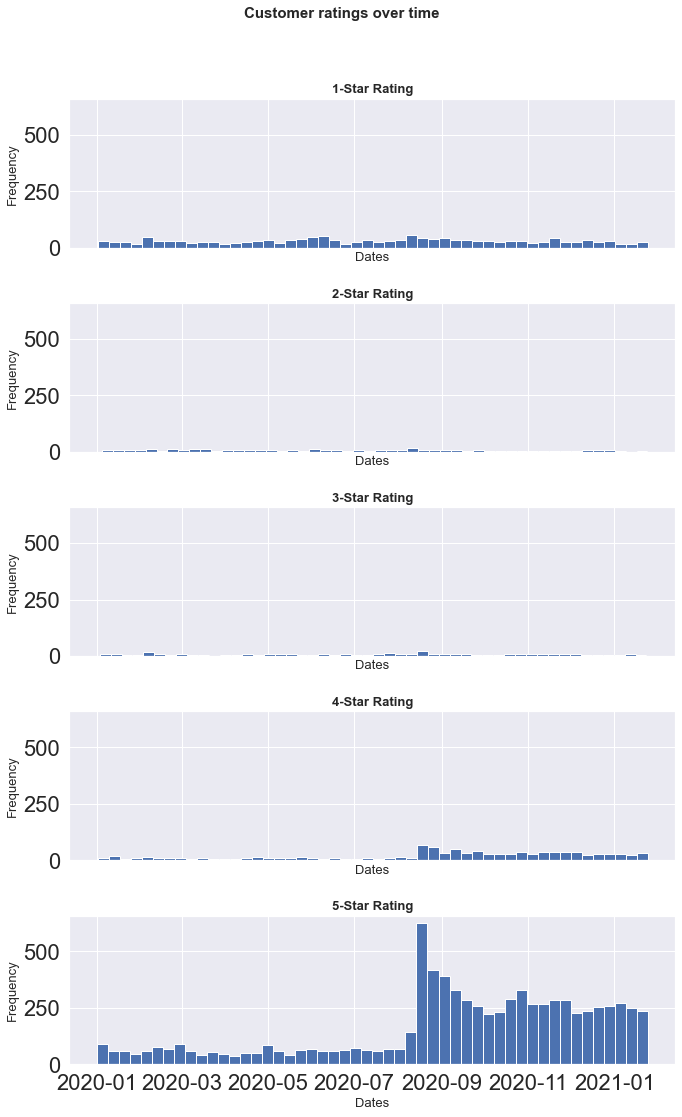

In [24]:
subplot_hist('Customer ratings over time',
            ['1-Star Rating','2-Star Rating','3-Star Rating','4-Star Rating','5-Star Rating'],
             'Dates')

In [25]:
# same id?
df[df.duplicated('reviewId')]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,target


In [26]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,target
0,gp:AOqpTOGgTfx2GgAOGAny8VIoUbJwOqzBr0VkVBs9nDM41Wf9NX-Z-ikQcuzv6aILoMabl7UxF1TYbjAGxBAf8Q,Melanie Gonzales,https://play-lh.googleusercontent.com/-421oOIvWRDs/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucm3MxvHFeuEFjRVWb9JIoeJg3JBIw/photo.jpg,Super Thank you.. kakapost kulang may buyer na agad ako,5,0,2.196.865.857,2021-01-24 14:59:23,NaN,NaT,1
1,gp:AOqpTOE1iWml800WvcBvrejM1DKVoyMGv8rH1gvU4TiS1u2upYlgv-2gRBO_Dk5B0FA8W-wYhdvkeI1oY4oHXQ,Christopher De Ocampo,https://play-lh.googleusercontent.com/a-/AOh14Ggd4sJarHxEJjARCq_CJvEkFXYX_iDgg0XYdKKhMA,D best,5,0,2.196.865.857,2021-01-24 14:42:43,NaN,NaT,1
2,gp:AOqpTOE880B1xYEXiJhEjozEPBmp3rAigjZFyvIruWDUWMZFr5LFv1JCu2Kp8iqFBDXA1GvtdrApVixh7nofIw,Riki Lam,https://play-lh.googleusercontent.com/a-/AOh14Gg0BWKmmDx480WzBbfgvfTZUwttLpked7W3AZ6eMaA,Quite good once you get the hang of it.,5,0,2.196.865.857,2021-01-24 13:53:41,NaN,NaT,1
3,gp:AOqpTOHe0b5CfdHWeFsbNJmQ4elG-i5Gzqbocwfxk4ihaN_22VJHmcnEONn9aIk6jK4SNJWrpGiUtXXQkVwkFQ,kitman tang,https://play-lh.googleusercontent.com/-C6QUVgmyMvs/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucnuSR9GpD_q-pKMKR9u88ZAADHWdw/photo.jpg,good app,5,0,2.196.865.857,2021-01-24 13:42:04,NaN,NaT,1
4,gp:AOqpTOEFQB_EECTinlxFqhoh4jlVaF24aVJzawI9yMQF2J9BNyGg8-cIdjNoM_UiF5rtkpo5ShT4JzHP73WfEg,Lee KM,https://play-lh.googleusercontent.com/-YTIYaDGzYqg/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucmtzcX4lFeM6ydPxXSN8lRvsNmm3Q/photo.jpg,Faster way selling of my staff,5,0,2.196.865.857,2021-01-24 13:26:55,NaN,NaT,1


# pre-processing

In [27]:
# !python -m spacy download en_core_web_sm


In [28]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [29]:
# Create a list of all the textual data from negative reviews
data = df[df['target']==0]['content'].values.tolist()

In [30]:
# Assign NLTK's stopwords to stop_words
stop_words = stopwords.words('english')

# Include frequently occuring words like
# stop_words.extend(['app', 'even'])

In [31]:
# Remove stopwords, lemmatize and only keep tokens that fall into these part of speech tags
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        # Lemmatize and only keep tokens that have certain part of speech tags
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags]) 
    # Remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

# Pre-processing text
data_ready = process_words(data)

In [32]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready) 

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, # Number of topics
                                           random_state=42,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.051*"item" + 0.033*"sell" + 0.028*"get" + 0.027*"use" + 0.022*"bad" + '
  '0.022*"post" + 0.020*"bump" + 0.017*"money" + 0.016*"good" + 0.015*"pay"'),
 (1,
  '0.037*"list" + 0.030*"even" + 0.027*"account" + 0.025*"fix" + 0.022*"try" + '
  '0.020*"search" + 0.020*"keep" + 0.017*"use" + 0.017*"go" + 0.017*"say"'),
 (2,
  '0.064*"app" + 0.039*"update" + 0.027*"seller" + 0.025*"carousell" + '
  '0.020*"make" + 0.017*"version" + 0.016*"ad" + 0.016*"buyer" + 0.015*"user" '
  '+ 0.014*"new"')]


In [33]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => Dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Formatting the table
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head()


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.5368,"app, update, seller, carousell, make, version, ad, buyer, user, new","[great, app, find, pre, love, item]"
1,1,2.0,0.6323,"app, update, seller, carousell, make, version, ad, buyer, user, new","[improve, much, time, easy, use, well, use, buyer, seller]"
2,2,2.0,0.5816,"app, update, seller, carousell, make, version, ad, buyer, user, new","[fast, sale, cliente, base]"
3,3,2.0,0.7227,"app, update, seller, carousell, make, version, ad, buyer, user, new","[great, app, work, really, well]"
4,4,0.0,0.5168,"item, sell, get, use, bad, post, bump, money, good, pay","[analytic, interface, easy, use, item, manage, sell, list, week]"


In [34]:
# Keywords of each dominant topic
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic') 

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show the 3 topics
sent_topics_sorteddf_mallet.head(10)


,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9597,"item, sell, get, use, bad, post, bump, money, good, pay","[good, enough, far, good, outwear, fashion, good, enough, luxury, fashion, use, woman, watch, luxury, brand, woman, bag]"
1,1.0,0.9639,"list, even, account, fix, try, search, keep, use, go, say","[send, pic, chat, crop, pic, want, crop, keep, say, server, encounter, problem, everytime, try, send, uncropped, pic, fix]"
2,2.0,0.9602,"app, update, seller, carousell, make, version, ad, buyer, user, new","[app, great, well, could, delete, text, negotiating, may, make, mistake, spelling, mistake, thank, take, time, look, review]"


# Topic Modelling

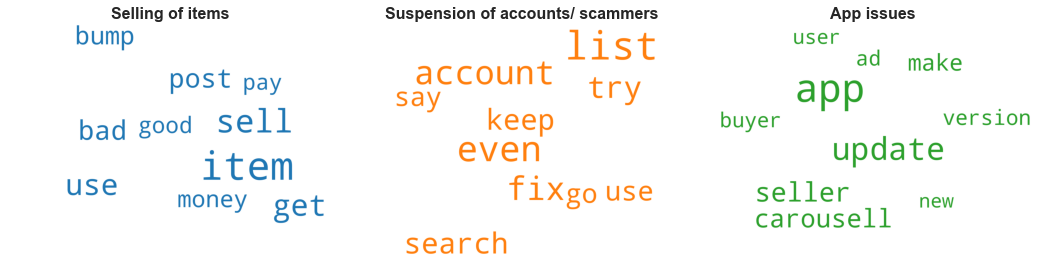

In [35]:
# Wordcloud of Top 10 words in each topic

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,10), sharex=True, sharey=True)

topic_names = ['Selling of items', 'Suspension of accounts/ scammers', 'App issues']

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(topic_names[i], weight='bold', fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [36]:
# Visualisation of the topics estimated using LDA
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.320279 -0.005025  1       1        38.547625
1      0.164680 -0.263373  2       1        33.855345
0      0.155600  0.268399  3       1        27.597030, topic_info=       Term         Freq        Total Category  logprob  loglift
0    app     2438.000000  2438.000000  Default  30.0000  30.0000
3    item    1387.000000  1387.000000  Default  29.0000  29.0000
335  update  1487.000000  1487.000000  Default  28.0000  28.0000
22   list    1260.000000  1260.000000  Default  27.0000  27.0000
24   sell    904.000000   904.000000   Default  26.0000  26.0000
..    ...           ...          ...       ...      ...      ...
69   thing   255.641426   284.785098   Topic3  -4.6740   1.1795 
12   use     747.074686   1335.422026  Topic3  -3.6016   0.7066 
56   many    382.045841   725.346986   Topic3  -4.2722   0.6464 
342  want    269.109319   438.020409   Topic3  -4.6227   0.8003 
1    find    222.905758   320.113627   Topic3  -4.8110   0.9255 

[144 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
153   2      0.998671  account
125   1      0.998166  ad     
377   1      0.996108  allow  
377   2      0.002913  allow  
167   2      0.997179  already
...  ..           ...    ...  
220   3      0.995500  way    
13    1      0.998252  well   
19    1      0.003102  work   
19    2      0.995869  work   
386   2      0.997835  wrong  

[142 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [37]:
# Browse through the reviews that contain the top words related to each topic
df[(df['target']==0) & (df['content'].str.contains('account'))]['content']

10044    What happen i cant see the review of the seller.. What happen to my account                                                                                                                                                                                                                                                                                                                                                                                                                                
10045    Best platform to sell/buy second-hand items so far, If only Carousell can provide/set up a more established account like: 1. Seller can input order number/tracking order 2. Virtual account for both seller/buyer At least these two, I'd give out my 5 stars !                                                                                                                                                                                                                                          